# Import libraries 

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Read data

In [83]:
df_fpt = pd.read_csv("FPT.csv", index_col='Date/Time')
df_fpt.head()
df_fpt.index = pd.to_datetime(df_fpt.index, format='%m/%d/%Y %H:%M')

In [84]:
df_msn = pd.read_csv("MSN.csv", index_col='Date/Time')
df_msn.head()
df_msn.index = pd.to_datetime(df_msn.index, format='%m/%d/%Y %H:%M')

In [85]:
df_pnj = pd.read_csv("PNJ.csv", index_col='Date/Time')
df_pnj.head()
df_pnj.index = pd.to_datetime(df_pnj.index, format='%m/%d/%Y %H:%M')

In [86]:
df_vic = pd.read_csv("VIC.csv", index_col='Date/Time')
df_vic.head()
df_vic.index = pd.to_datetime(df_vic.index, format='%m/%d/%Y %H:%M')

In [87]:
df = pd.concat([df_fpt, df_msn, df_pnj, df_vic], ignore_index=False)
df.index = pd.to_datetime(df.index, format='%m/%d/%Y %H:%M')
df.head()

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
2018-12-25 09:15:00,FPT,30.89,30.89,30.89,30.89,35410,0
2018-12-25 09:16:00,FPT,30.81,30.81,30.81,30.81,190,0
2018-12-25 09:17:00,FPT,30.74,30.81,30.74,30.74,1120,0
2018-12-25 09:18:00,FPT,30.74,30.74,30.74,30.74,2120,0
2018-12-25 09:19:00,FPT,30.74,30.74,30.74,30.74,22500,0


In [88]:
# combine all rows into one row each day take the Open as the first value and Close as the last value, High as the max value and Low as the min value, Volume as the sum of all values.
df_fpt_merged = df_fpt.resample('D').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})
df_fpt_merged.head()

,Open,High,Low,Close,Volume
Date/Time,,,,,
2018-12-25,30.89,30.89,30.59,30.66,84960
2018-12-26,31.04,31.22,30.89,30.89,333590
2018-12-27,31.41,31.52,31.19,31.19,454860
2018-12-28,31.34,31.49,31.19,31.49,387170
2018-12-29,NaN,NaN,NaN,NaN,0


In [89]:
df_msn_merged = df_msn.resample('D').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})
df_msn_merged.head()

,Open,High,Low,Close,Volume
Date/Time,,,,,
2017-12-25,73.1,75.4,73.0,74.2,207370
2017-12-26,74.9,75.5,74.3,75.5,403710
2017-12-27,74.9,75.7,74.8,75.0,517920
2017-12-28,75.0,76.0,74.5,75.7,377030
2017-12-29,76.0,77.0,76.0,76.7,226880


In [90]:
df_pnj_merged = df_pnj.resample('D').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})
df_pnj_merged.head()

,Open,High,Low,Close,Volume
Date/Time,,,,,
2018-02-28,78.14,80.61,78.09,78.71,8158
2018-03-01,78.14,80.32,77.66,77.66,20511
2018-03-02,77.14,77.90,76.86,77.33,37274
2018-03-03,NaN,NaN,NaN,NaN,0
2018-03-04,NaN,NaN,NaN,NaN,0


In [91]:
df_vic_merged = df_vic.resample('D').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})
df_vic_merged.head()

,Open,High,Low,Close,Volume
Date/Time,,,,,
2018-10-17,98.5,99.6,98.3,99.0,1266610
2018-10-18,98.5,99.2,98.0,99.1,896140
2018-10-19,96.5,99.1,96.5,99.1,915870
2018-10-20,NaN,NaN,NaN,NaN,0
2018-10-21,NaN,NaN,NaN,NaN,0


# EDA

## NA values

In [92]:
# deadling with missing values

print("FPT stock", df_fpt_merged.isnull().sum())
print("MSN stock", df_msn_merged.isnull().sum())
print("PNJ stock", df_pnj_merged.isnull().sum())
print("VIC stock", df_vic_merged.isnull().sum())

FPT stock Open      230
High      230
Low       230
Close     230
Volume      0
dtype: int64
MSN stock Open      346
High      346
Low       346
Close     346
Volume      0
dtype: int64
PNJ stock Open      320
High      320
Low       320
Close     320
Volume      0
dtype: int64
VIC stock Open      250
High      250
Low       250
Close     250
Volume      0
dtype: int64


In [99]:
# fill missing values with linear regression model (interpolate method)
for col in df_fpt_merged.columns:
        df_fpt_merged[col] = df_fpt_merged[col].interpolate(method='linear')
        df_msn_merged[col] = df_msn_merged[col].interpolate(method='linear')
        df_pnj_merged[col] = df_pnj_merged[col].interpolate(method='linear')
        df_vic_merged[col] = df_vic_merged[col].interpolate(method='linear')
# recheck missing values
print("FPT stock", df_fpt_merged.isnull().sum())
print("MSN stock", df_msn_merged.isnull().sum())
print("PNJ stock", df_pnj_merged.isnull().sum())
print("VIC stock", df_vic_merged.isnull().sum())



FPT stock Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
MSN stock Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
PNJ stock Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
VIC stock Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [94]:
df_fpt['month']=df_fpt.index.month_name()
df_fpt['day_of_week']=df_fpt.index.day_name()

df_msn['month']=df_msn.index.month_name()
df_msn['day_of_week']=df_msn.index.day_name()

df_pnj['month']=df_pnj.index.month_name()
df_pnj['day_of_week']=df_pnj.index.day_name()

df_vic['month']=df_vic.index.month_name()
df_vic['day_of_week']=df_vic.index.day_name()



## Profiling

In [ ]:
prof = ProfileReport(df_fpt_merged)
prof.to_file(output_file='df_fpt_output.html')


In [ ]:
prof = ProfileReport(df_msn_merged)
prof.to_file(output_file='df_msn_output.html')

In [ ]:
prof = ProfileReport(df_pnj_merged)
prof.to_file(output_file='df_pnj_output.html')

In [ ]:
prof = ProfileReport(df_vic_merged)
prof.to_file(output_file='df_vic_output.html')

## Daily Return Analysis

$$C = \frac{x_2 - x_1}{x_1}$$

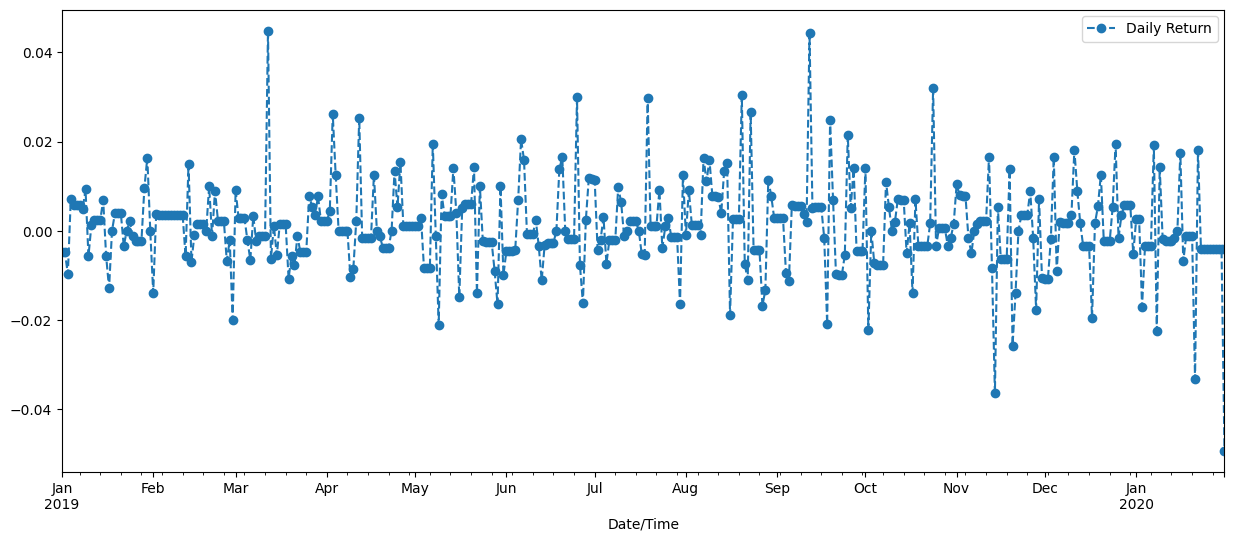

In [ ]:
# we want to check the daily return percentage and using fpt stock as an representative
# use pct_change to find the percent change for each day
df_fpt_merged['Daily Return'] = df_fpt_merged['Close'].pct_change() 
# pct_change() is used to find the percent change for each day using the formular above.

# plot the daily return percentage
df_fpt_merged['Daily Return']['1-2019':'1-2020'].plot(figsize=(15,6),legend=True,linestyle='--',marker='o')
plt.show()

The daily return of fpt stock show that there are functuations in the stock which greatly depends on the market.

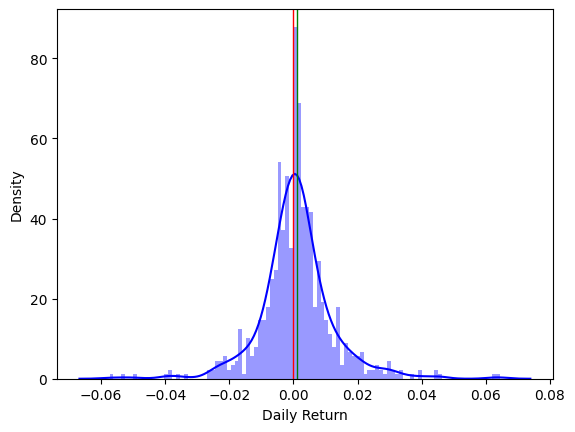

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(df_fpt_merged['Daily Return'].dropna(),bins=100,color='blue')
# 0 line
plt.axvline(0,linewidth=1,color='red')
# mean
plt.axvline(df_fpt_merged['Daily Return'].mean(),linewidth=1,color='green')
plt.show()

Although the daily return of fpt stock is unstable, the mean of daily return is positive and lightly varied between -0.02 to 0.02, which means that the stock is profitable and the trend of the stock is increasing.

In [ ]:
# concat all closing price of 4 stocks
closing_df_fpt = pd.DataFrame(df_fpt_merged['Close']).rename(columns={'Close': 'FPT_Close'})
closing_df_msn = pd.DataFrame(df_msn_merged['Close']).rename(columns={'Close': 'MSN_Close'})
closing_df_pnj = pd.DataFrame(df_pnj_merged['Close']).rename(columns={'Close': 'PNJ_Close'})
closing_df_vic = pd.DataFrame(df_vic_merged['Close']).rename(columns={'Close': 'VIC_Close'})
closing_df = pd.concat([closing_df_fpt, closing_df_msn, closing_df_pnj, closing_df_vic], axis=1)
closing_df.head()

,FPT_Close,MSN_Close,PNJ_Close,VIC_Close
Date/Time,,,,
2017-12-25,NaN,74.2,NaN,NaN
2017-12-26,NaN,75.5,NaN,NaN
2017-12-27,NaN,75.0,NaN,NaN
2017-12-28,NaN,75.7,NaN,NaN
2017-12-29,NaN,76.7,NaN,NaN


In [ ]:
# drop all rows with NA values to balance the data among 4 stocks
closing_df_cpy = closing_df.dropna()
closing_df_cpy.head()

,FPT_Close,MSN_Close,PNJ_Close,VIC_Close
Date/Time,,,,
2018-12-25,30.66,80.00,67.360,101.90
2018-12-26,30.89,79.00,67.220,101.90
2018-12-27,31.19,79.00,68.150,102.40
2018-12-28,31.49,77.50,69.040,95.30
2018-12-29,31.34,77.72,68.572,96.32


In [ ]:
# get the daily return of each stock
daily_return_df = closing_df_cpy.pct_change()
daily_return_df.index = pd.to_datetime(daily_return_df.index, format='%m/%d/%Y %H:%M')

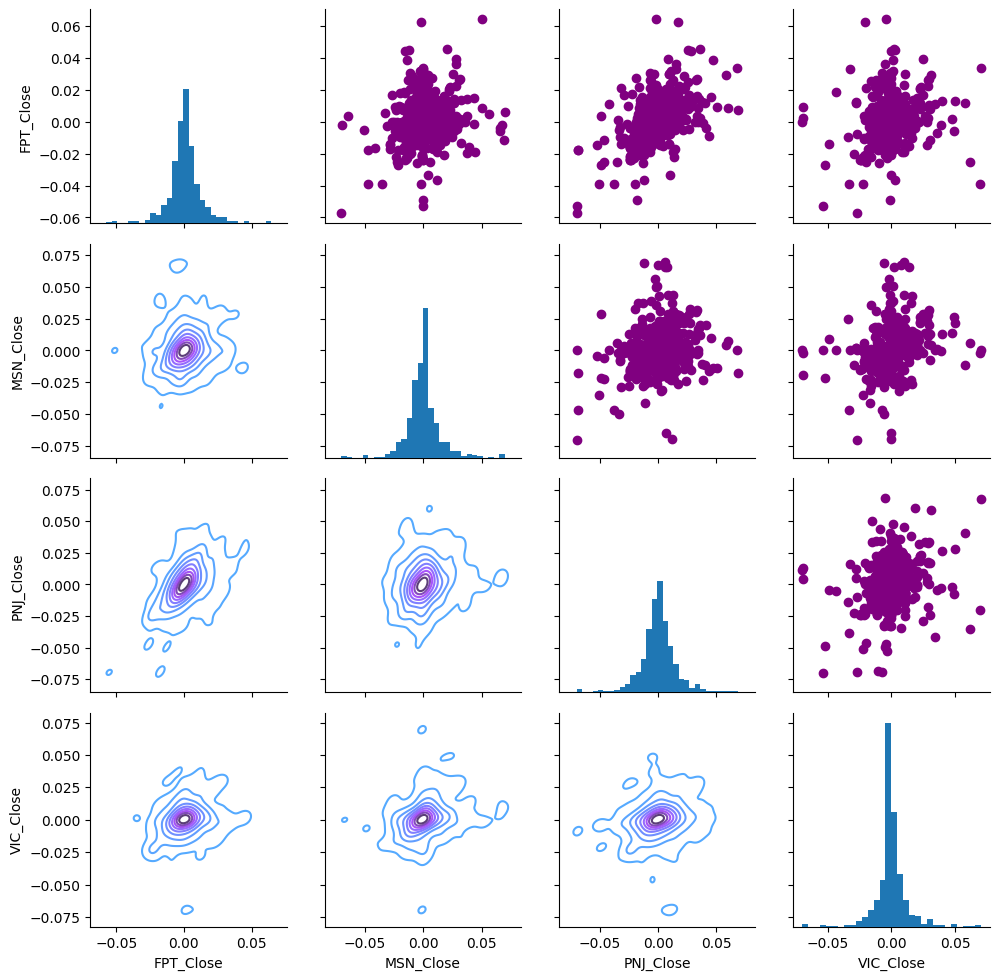

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(daily_return_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

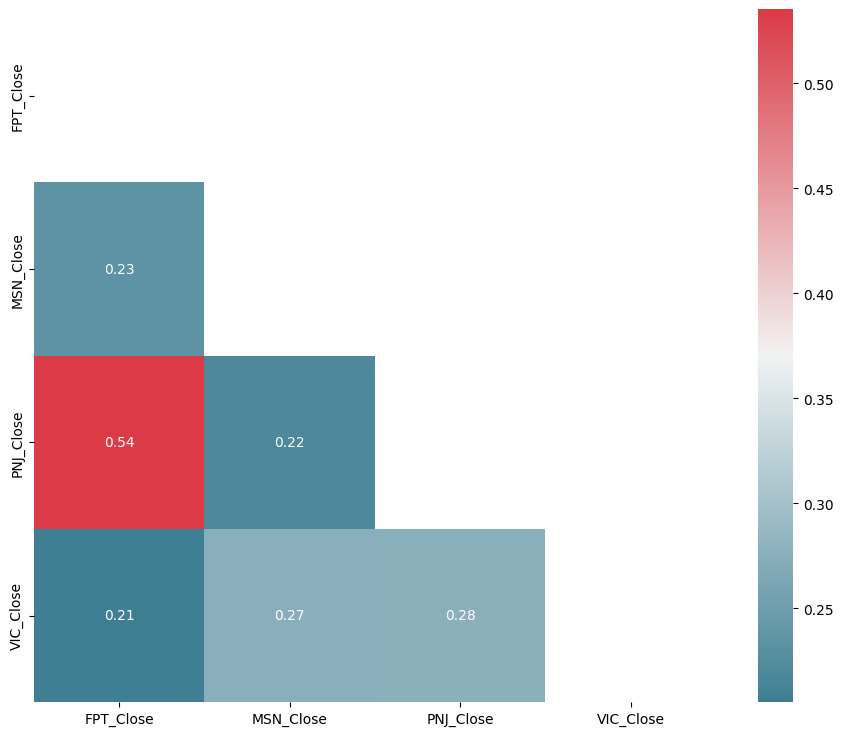

In [ ]:
# use sebron for a quick correlation plot for the daily returns

# Compute the correlation matrix
corr = daily_return_df.dropna().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True)
plt.show()

all pair plots and matries showing that there is no strong correlation between the daily return of all 4 stocks and the only the highest, at 0.54, is from FPT stock and PNJ stock.

## Stocks' Factors Analysis

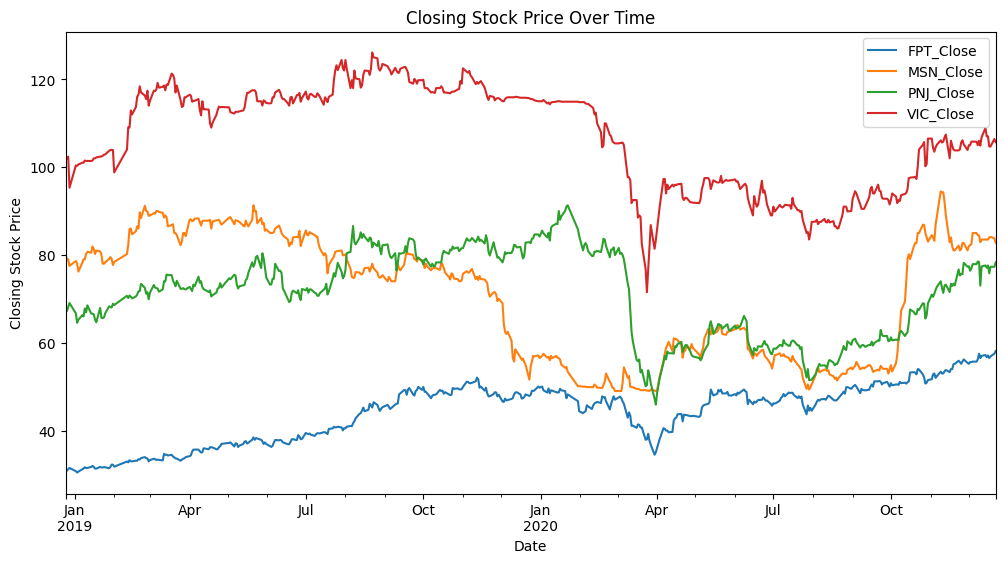

In [ ]:
#plot all 4 stocks closing price in one chart
closing_df_cpy.plot(figsize=(12, 6))
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

### The plot above shows the Close price of fpt stock from 2019 to 2021. 
- We can see that the price of fpt stock has increased significantly in this period but have the significant drop in 2020 due to the Covid-19 pandemic. However, the price has recovered and increased again in the end of 2020 and the beginning of 2021.
- The increase in the price of fpt stock is due to the increase in the company's revenue and profit.

### This supports the hypothesis that the price of stock is affected by inner factors (the company's revenue and profit) and the outer factors such as Covid-19 pandemic.

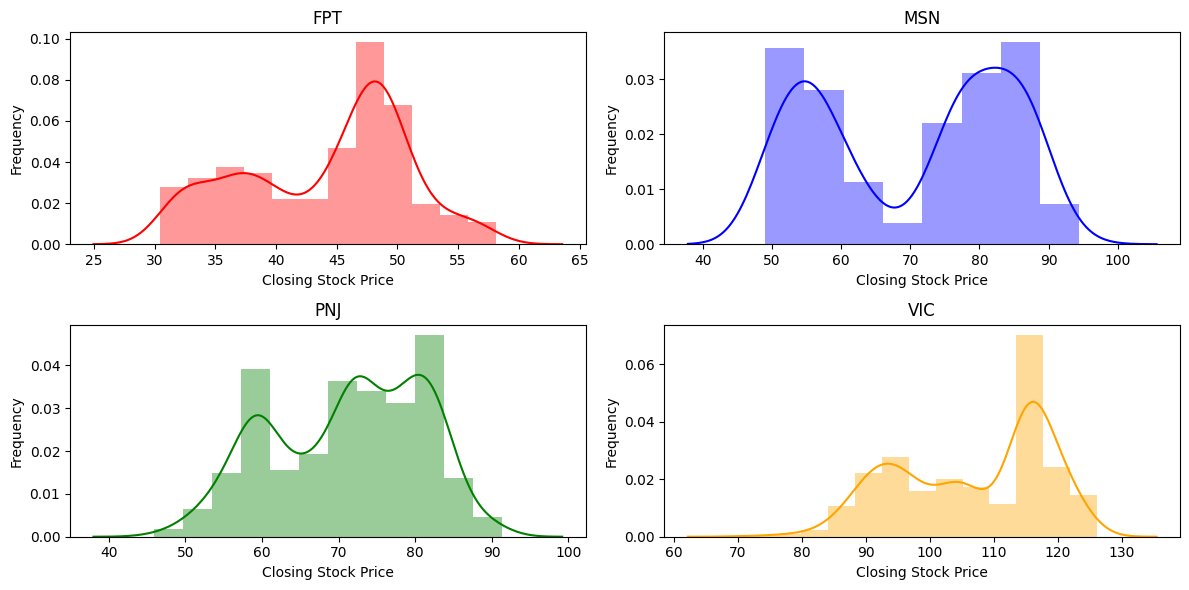

In [ ]:
# plot the distribution of the closing price of each stock
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.distplot(closing_df_cpy['FPT_Close'], color='red')
plt.title('FPT')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.subplot(2, 2, 2)
sns.distplot(closing_df_cpy['MSN_Close'], color='blue')
plt.title('MSN')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.subplot(2, 2, 3)
sns.distplot(closing_df_cpy['PNJ_Close'], color='green')
plt.title('PNJ')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.subplot(2, 2, 4)
sns.distplot(closing_df_cpy['VIC_Close'], color='orange')
plt.title('VIC')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

We can see that the distributions of the closing price of each stock having the similar shape but located in different ranges and, again, shows that the closing price are of each stock are independent to each other.

In [ ]:
# Let's go ahead and plot out several moving averages
ma_day = [7,10,20]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df_fpt_merged[column_name]=pd.DataFrame.rolling(df_fpt_merged['Close'],ma).mean()

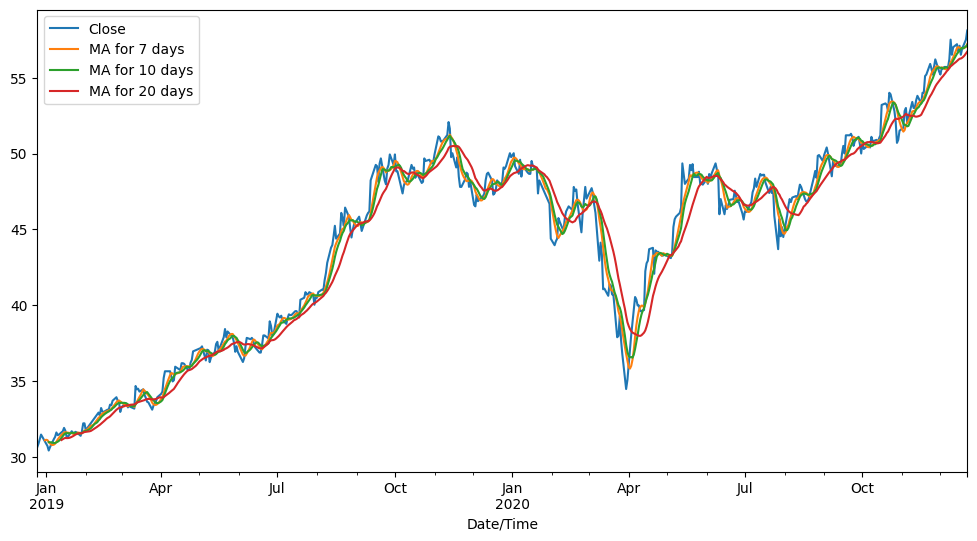

In [ ]:
df_fpt_merged[['Close','MA for 7 days','MA for 10 days','MA for 20 days']].plot(subplots=False,figsize=(12,6))
plt.show()

MA 10 and MA 20 are too smooth to be used as a factor to predict the price of stock; whereas, MA 7 can still preserve the trend of the stock and can be used as a factor to predict the price of stock.

Text(0, 0.5, 'Bicentennial Bikeway Cyclists at Milton')

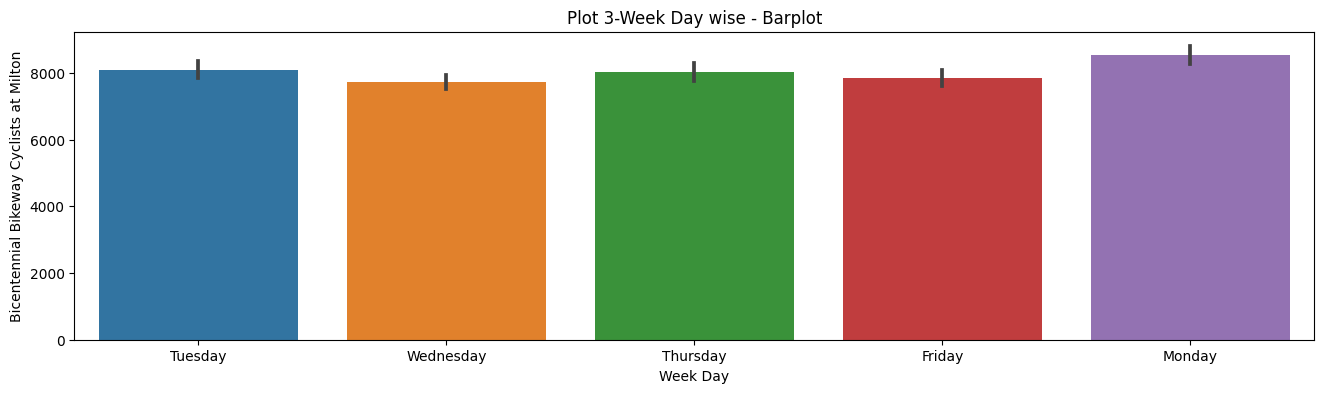

In [ ]:
fig, axes = plt.subplots(1,1,squeeze=False)
fig.set_size_inches(16,4)
sns.barplot(data=df_fpt, x='day_of_week', y=df_fpt['Volume'], ax=axes[0,0])
axes[0,0].set_title("Plot 3-Week Day wise - Barplot")
axes[0,0].set_xlabel('Week Day')
axes[0,0].set_ylabel('Bicentennial Bikeway Cyclists at Milton')

This shows that the highest number of transactions usually happens on Monday and the lowest number of transactions usually happens on Friday and mostly because the investors usually buy stock on Monday and sell stock on Friday.